In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Latihan PCA & K-Means**


**Gunakan dataset Creditcard**

- Lakukan EDA untuk memahami dataset yang sedang dikerjakan.
- Lakukan data cleaning yang diperlukan dan lakukan scaling dengan Standardscaler.

- Lakukan PCA, lalu coba analisis antara jumlah komponen dan % informasi yang diekstraksi (variance explained).

- Untuk tujuan latihan kali ini, lakukan clustering dengan menggunakan 2 principal components, lalu cari jumlah cluster terbaik dengan elbow method dan silhouette score.
- Interpretasikan hasil clustering-nya.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JCDSVL-04, 06, 07, JCDSOL-09, JCDSAHLS-01 Practice Session/Modul 3/Week 9/Tuesday, April 11, 2023/creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### **Feature information**

- CUSTID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases (
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASHADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Numbe of purchase transactions made
- CREDITLIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## **EDA**

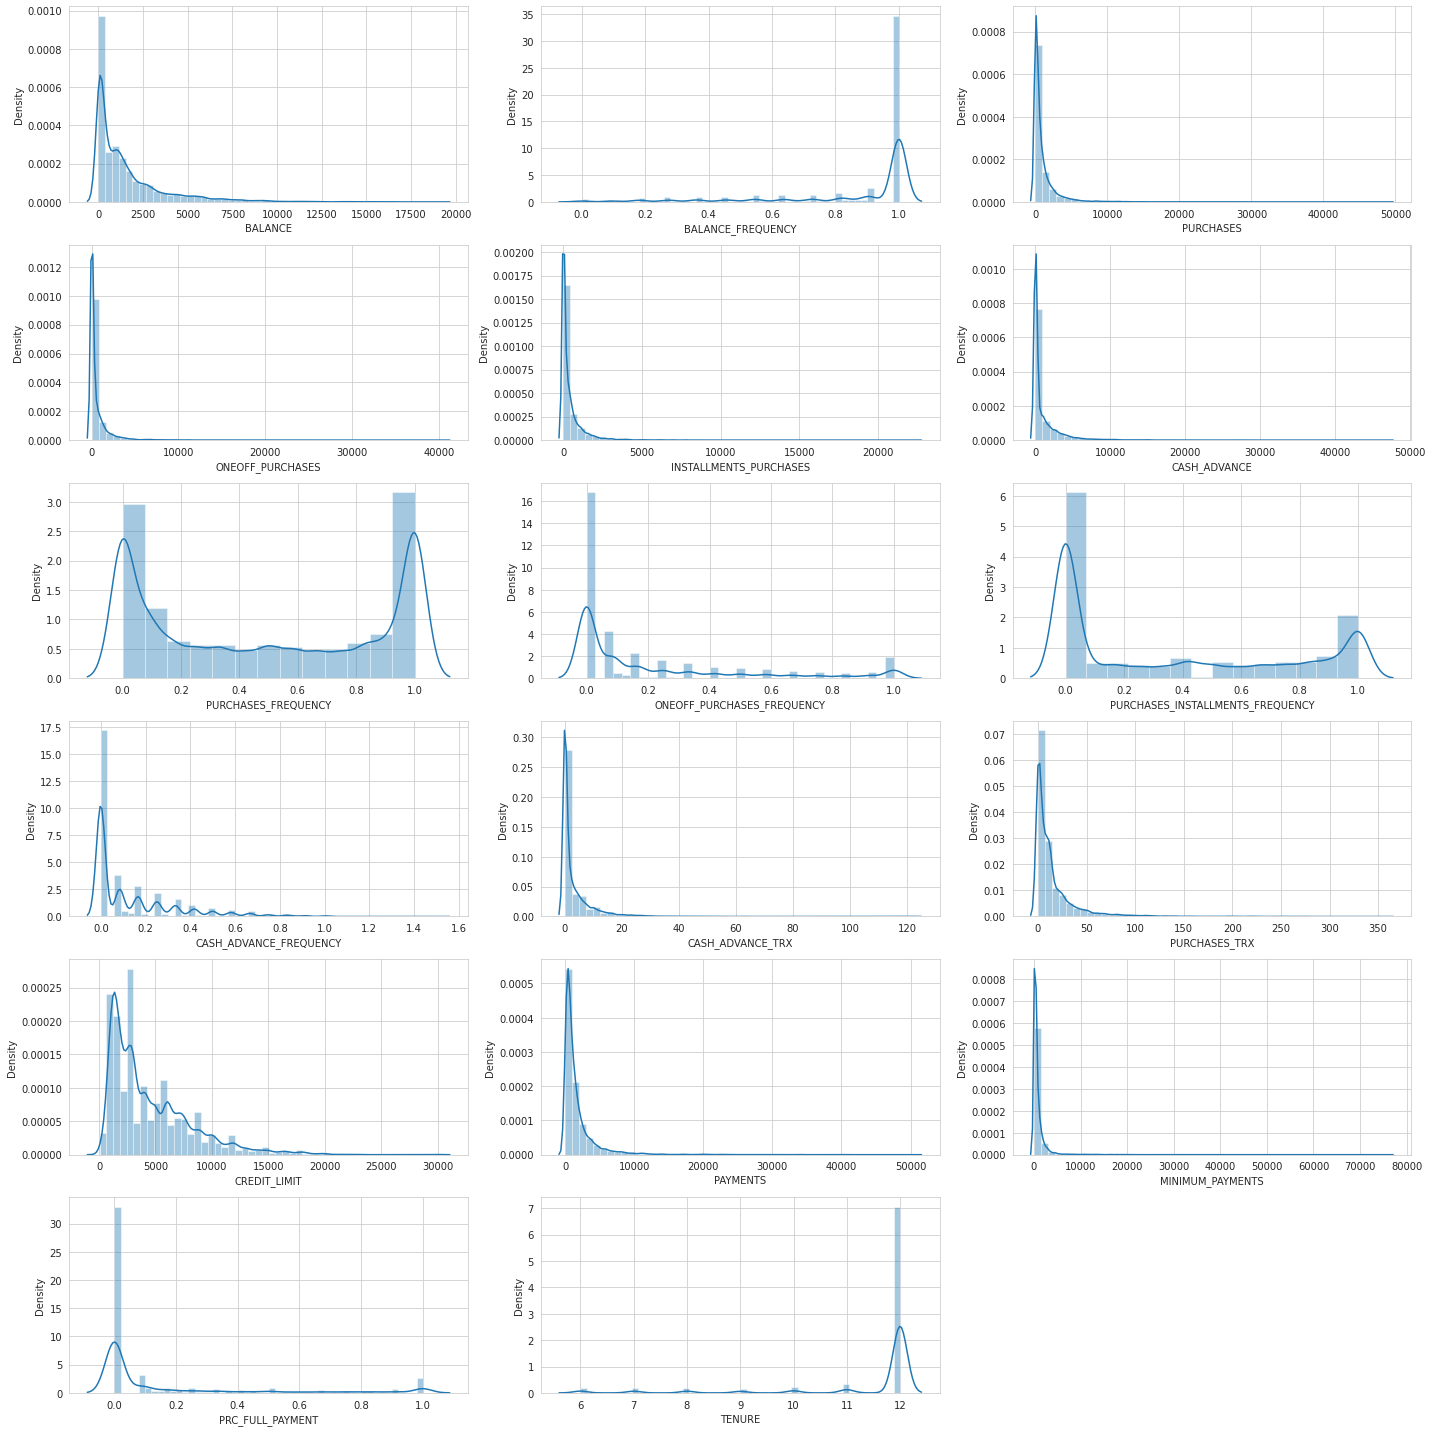

In [ ]:
plt.figure(figsize=(20,20))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 3, i)
        sns.distplot(df[col], kde_kws = {'bw' : 0.1}, ax=ax)
        plt.xlabel(col)
        plt.tight_layout()

plt.show();

### **Interpretasi**

- Rentang nilai dari tiap feature berbeda beda.
- Untuk menggunakan PCA, lebih baik datanya dilakukan scaling karena secara matematis PCA akan menghitung jarak antar data point
- Terdapat skewness di semua fitur numerikal pada dataset ini.

Untuk clustering, kita sebaiknya meminimalisasi skewness terlebih dahulu agar nantinya model dapat membuat cluster secara lebih optimal.

### **Correlation**

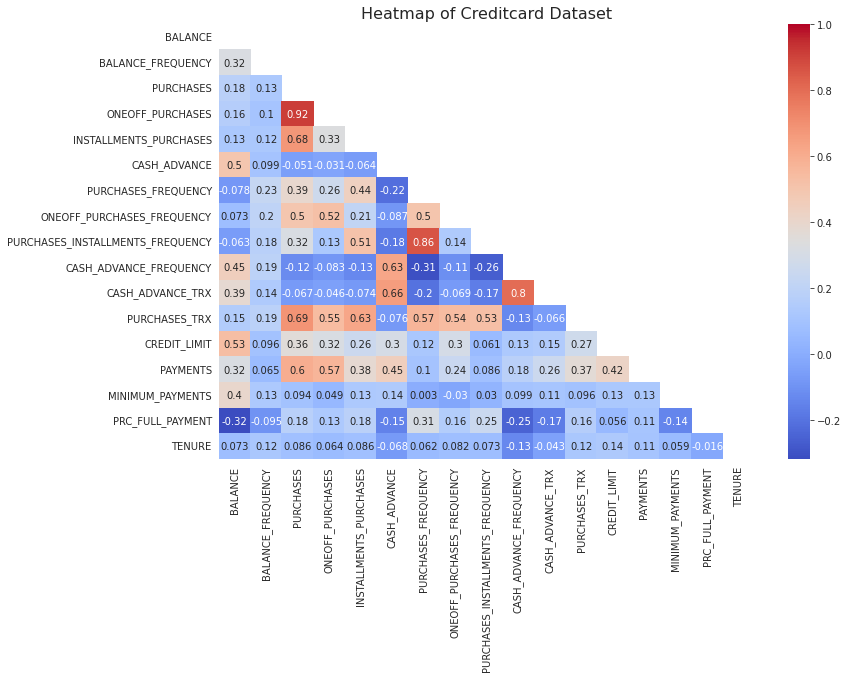

In [ ]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(12, 8))
plt.title('Heatmap of Creditcard Dataset', size=16)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1);

### **Interpretasi**

Terdapat beberapa fitur yang memiliki korelasi tinggi. Dengan kata lain, kita dapat menggunakan metode dimensionality reduction (PCA) agar nantinya inputan model memiliki dimensi yang lebih kecil, namun masih memuat informasi yang hampir sama (variance tetap maksimal).

## **Data Preprocessing**

### **Drop unused columns**

Karena Customer ID adalah ID unik untuk tiap customer, maka fitur ini tidak memiliki peranan penting untuk penentuan cluster nantinya.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JCDSVL-04, 06, 07, JCDSAHLS-01 Practice Session/Modul 3/Week 9/Tuesday, October 18, 2022/creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

### **Drop missing value pada CREDIT_LIMIT**



In [ ]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

### **Imputasi missing value pada MINIMUM_PAYMENTS**

Karena distribusi pada MINIMUM_PAYMENTS tidak mengikuti distribusi normal (terdapat skewness), maka mengimputasi missing value dengan menggunakan nilai median akan memberikan estimasi nilai yang lebih baik.

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

### **Scaling data**

- scaling dibutuhkan pada PCA karena menghitung jarak
- scaling dibutuhkan pada KMeans clustering karena menghitung jarak

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341275,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228291,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326900,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338330,0.329128,-4.126919


In [ ]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,0.000000,-3.144205e-16,-8.257509e-17,-4.128754e-17,1.746781e-17,-1.587982e-17,7.701715e-17,-6.351930e-18,4.605149e-17,-1.270386e-17,1.587982e-17,1.905579e-17,2.159656e-16,6.351930e-17,1.270386e-17,-3.175965e-18,-2.794849e-16
std,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-0.751704,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.221928e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.918405e-01,-1.221468e+00,-5.987332e-01,-3.622228e-01,-5.255884e-01,-4.126919e+00
25%,-0.690033,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.014290e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.516107e-01,-7.954817e-01,-4.663388e-01,-2.889810e-01,-5.255884e-01,3.605413e-01
50%,-0.331962,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,-4.668054e-01,2.390672e-02,-3.993831e-01,-4.977267e-01,-6.752945e-01,-4.760829e-01,-3.102316e-01,-4.107196e-01,-3.026846e-01,-2.282908e-01,-5.255884e-01,3.605413e-01
75%,0.235279,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,6.432979e-02,1.062103e+00,3.268871e-01,9.700395e-01,4.351431e-01,1.100315e-01,9.206698e-02,5.511855e-01,5.801121e-02,-2.412652e-02,-3.717957e-02,3.605413e-01
max,8.397195,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,2.201002e+01,1.269742e+00,2.673295e+00,1.599083e+00,6.820167e+00,1.754694e+01,1.381045e+01,7.009692e+00,1.692160e+01,3.239112e+01,2.893277e+00,3.605413e-01


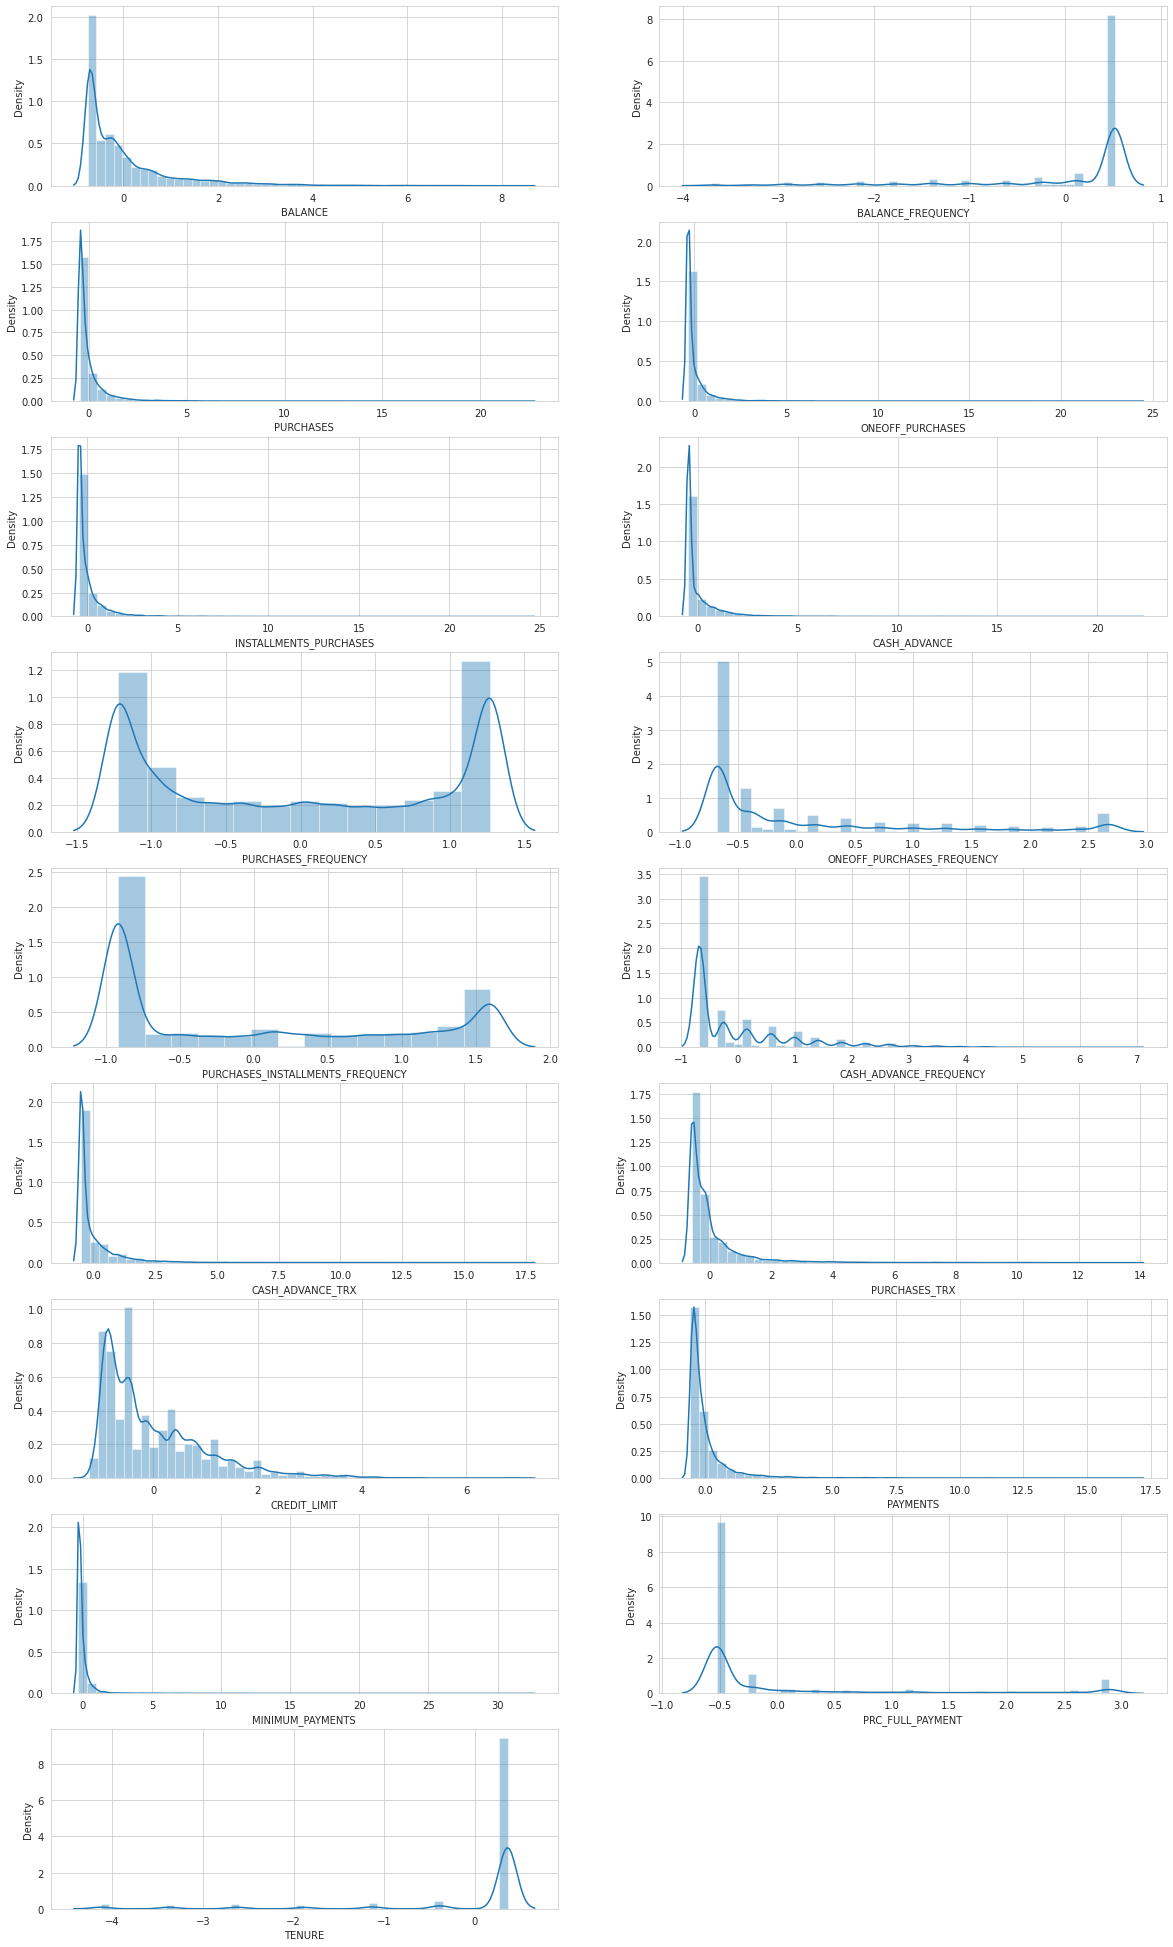

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_scaled.columns):
    if df_scaled[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df_scaled[col], kde_kws = {'bw' : 0.1}, ax=ax)
        plt.xlabel(col)

plt.show()

### **Interpretasi**

Meskipun masih terdapat skewness pada data, namun dengan melakukan standarisasi, kita sudah meminimalkan skala dari tiap feature sehingga memiliki nilai mean = 0 dan std = 1.

## **Dimensionality reduction (PCA)**

In [ ]:
# fit PCA ke dataset yang sudah discaling
pca = PCA(random_state=0)
pca.fit(df_scaled)

PCA(random_state=0)

In [ ]:
pca.components_

array([[ 1.01650064e-01,  1.20341738e-01,  4.11594903e-01,
         3.46361308e-01,  3.36784336e-01, -2.28892810e-02,
         3.21240413e-01,  2.94498672e-01,  2.74499477e-01,
        -8.86334712e-02, -4.82138990e-02,  3.90623609e-01,
         2.11890213e-01,  2.66457917e-01,  6.32278827e-02,
         1.31840687e-01,  8.08818754e-02],
       [ 4.03834263e-01,  1.31378274e-01,  4.01137155e-02,
         6.19966190e-02, -1.91102861e-02,  4.39008016e-01,
        -1.91126463e-01, -1.85076216e-02, -1.78846109e-01,
         4.34103624e-01,  4.19618574e-01, -2.00943478e-02,
         2.38062261e-01,  2.56763059e-01,  1.69068143e-01,
        -1.90053526e-01, -4.37502710e-03],
       [-1.61462396e-01, -4.22778977e-01,  2.57330557e-01,
         3.90845327e-01, -1.09512788e-01, -2.32774591e-02,
        -3.71617422e-01,  1.15587535e-01, -4.69863172e-01,
        -1.05060017e-01, -1.10578624e-01, -7.61226548e-02,
         1.00870598e-01,  2.77351465e-01, -2.34344732e-01,
         1.26375151e-01, -6.6

In [ ]:
index_values = ["PCA"+str(x) for x in range(1,pca.n_components_+1)]
column_values = pca.feature_names_in_
components = pd.DataFrame(data = pca.components_,
                  index = index_values,
                  columns = column_values)
components

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PCA1,0.101650,0.120342,0.411595,0.346361,0.336784,-0.022889,0.321240,0.294499,0.274499,-0.088633,-0.048214,0.390624,0.211890,0.266458,0.063228,0.131841,0.080882
PCA2,0.403834,0.131378,0.040114,0.061997,-0.019110,0.439008,-0.191126,-0.018508,-0.178846,0.434104,0.419619,-0.020094,0.238062,0.256763,0.169068,-0.190054,-0.004375
PCA3,-0.161462,-0.422779,0.257331,0.390845,-0.109513,-0.023277,-0.371617,0.115588,-0.469863,-0.105060,-0.110579,-0.076123,0.100871,0.277351,-0.234345,0.126375,-0.066300
PCA4,0.279547,0.155706,0.041342,0.084447,-0.057413,-0.256519,-0.194131,0.033813,-0.224471,-0.264475,-0.328202,-0.020551,0.131503,-0.112401,0.393038,-0.419822,0.437848
PCA5,0.050394,-0.477252,0.027012,-0.161708,0.360932,0.098534,-0.099308,-0.540373,0.177404,-0.145127,-0.083059,-0.036703,0.087384,0.201619,0.413228,0.145386,0.002219
PCA6,0.042671,0.020253,0.181002,0.179779,0.097676,-0.144487,-0.048183,-0.006760,-0.048038,0.056917,-0.065529,0.100059,-0.319942,-0.114260,0.292555,-0.350706,-0.745687
PCA7,-0.254068,0.100335,0.200025,0.120463,0.251714,-0.048777,-0.150399,-0.280851,0.038346,0.144564,0.199017,0.109797,-0.557151,0.156324,-0.201211,-0.301447,0.404206
PCA8,-0.170608,0.283900,0.026018,0.126779,-0.171428,-0.022460,-0.048346,0.080807,-0.160831,0.045655,0.101674,-0.102000,-0.341068,0.087457,0.569554,0.572942,0.097269
PCA9,0.128167,0.616169,0.104684,0.013774,0.222227,-0.049275,-0.218707,-0.400756,-0.067204,-0.087661,-0.254983,-0.198921,0.158534,0.090629,-0.293903,0.233004,-0.204223
PCA10,0.031295,-0.081664,0.051202,-0.175445,0.443323,-0.359188,-0.250722,0.109778,-0.252521,0.285985,0.218561,0.248584,0.158376,-0.466171,-0.004700,0.241106,0.053060


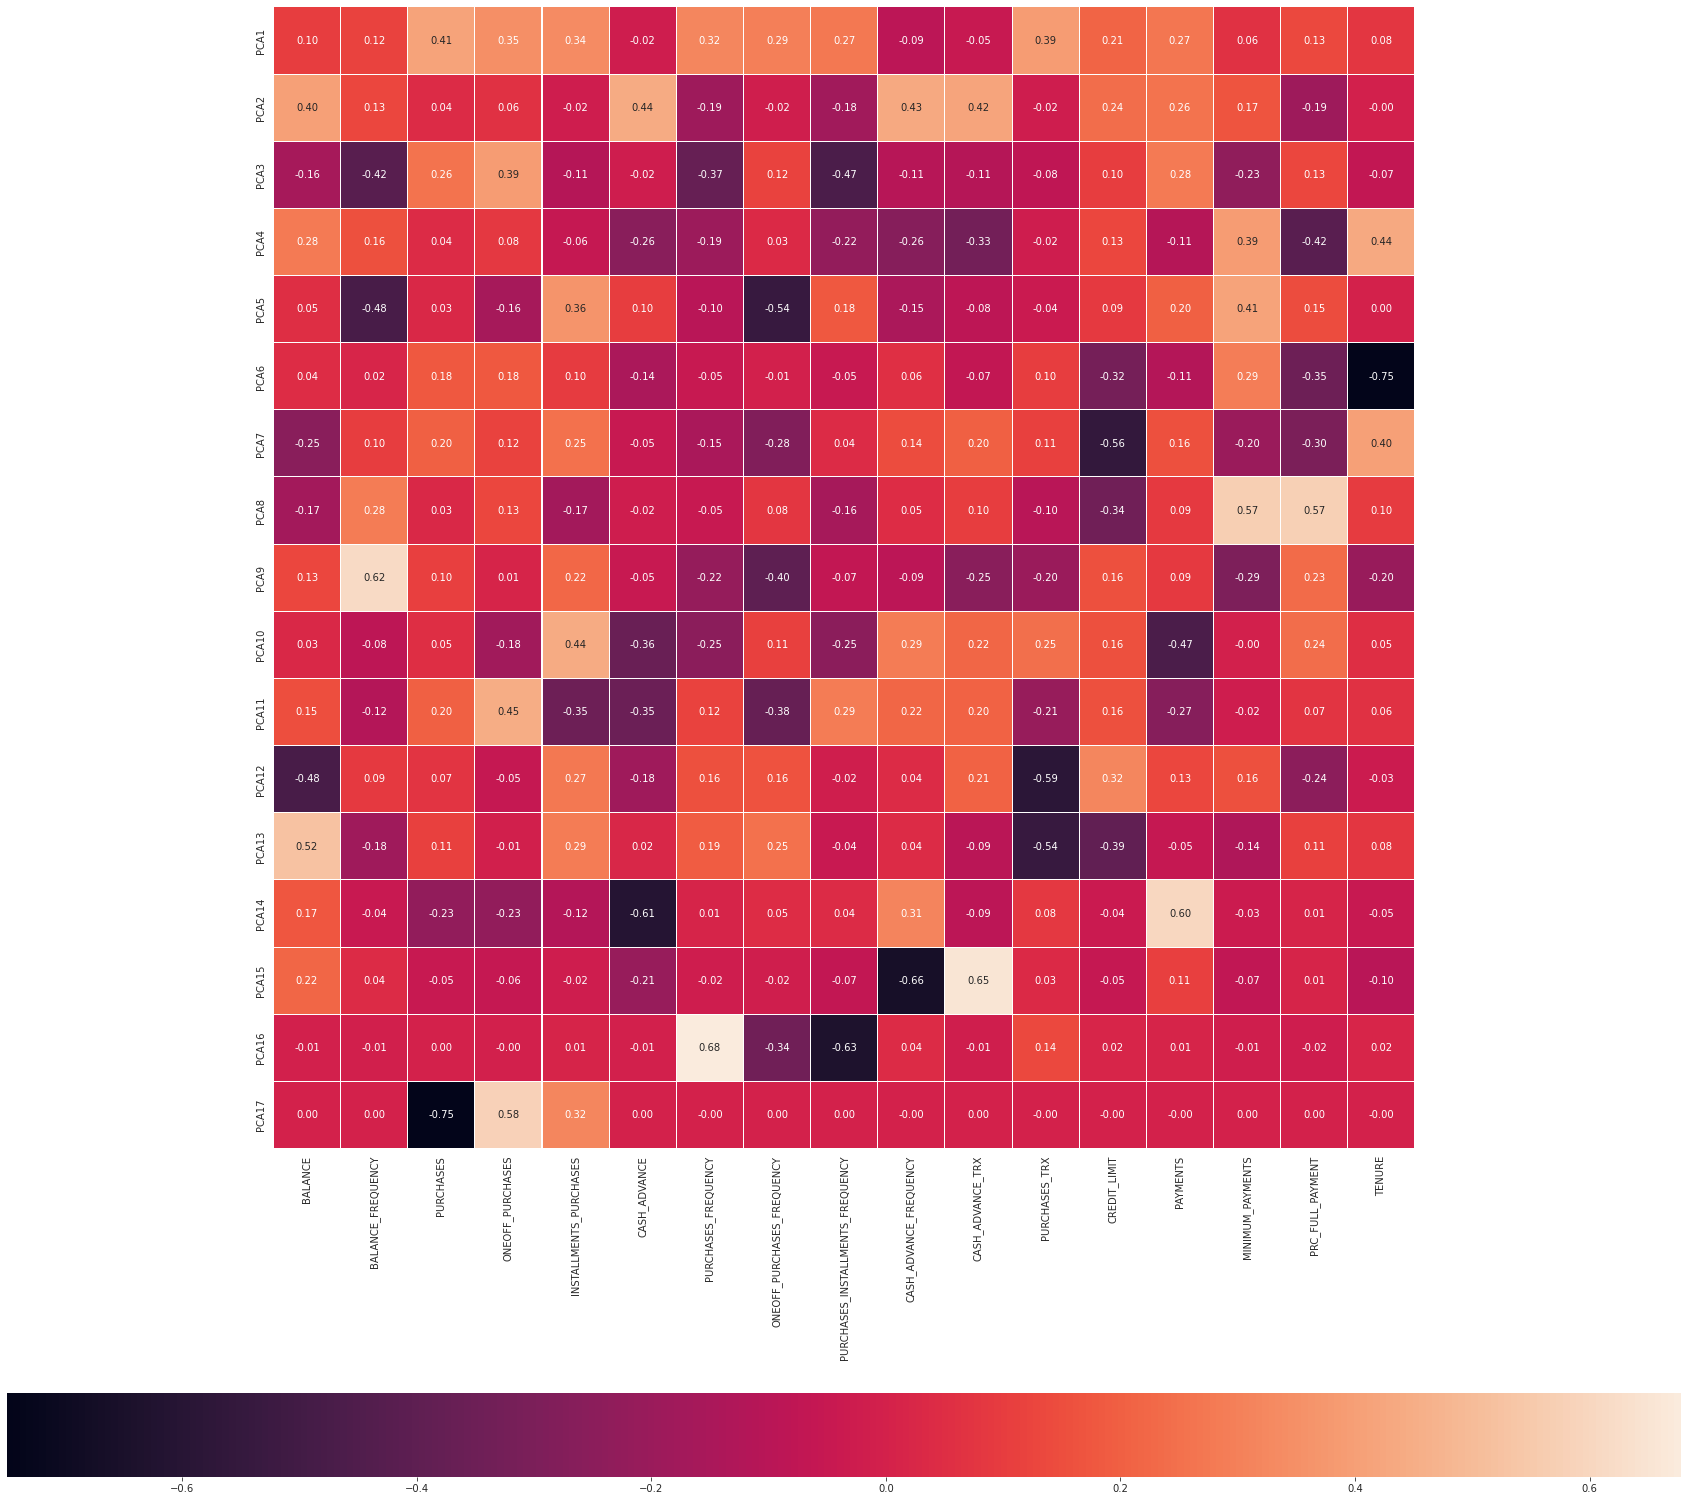

In [ ]:
plt.figure(figsize=(30,30))

PCA_components = sns.heatmap(pca.components_,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=pca.feature_names_in_,
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [ ]:
pca.explained_variance_

array([4.64069094e+00, 3.45383249e+00, 1.49825810e+00, 1.27182232e+00,
       1.05843228e+00, 9.75816981e-01, 8.30339053e-01, 7.30838381e-01,
       6.46053730e-01, 5.23671532e-01, 4.03349880e-01, 3.01522052e-01,
       2.42781136e-01, 2.06896622e-01, 1.72178015e-01, 4.54047025e-02,
       1.16503997e-05])

In [ ]:
pca.explained_variance_ratio_

array([2.72951316e-01, 2.03143914e-01, 8.81229812e-02, 7.48047175e-02,
       6.22537650e-02, 5.73945847e-02, 4.88380157e-02, 4.29856891e-02,
       3.79989139e-02, 3.08007655e-02, 2.37238122e-02, 1.77346094e-02,
       1.42796474e-02, 1.21690296e-02, 1.01269868e-02, 2.67056640e-03,
       6.85241052e-07])

In [ ]:
pca.noise_variance_

0.0

In [ ]:
pca.n_features_in_

17

In [ ]:
pca.feature_names_in_

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

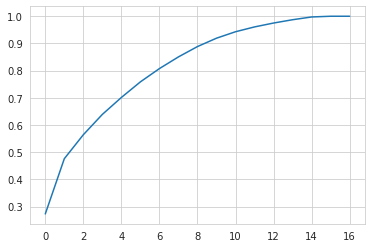

In [ ]:
# cummulative sum of variance dari seluruh 16 components
sns.set_style('whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
pca.n_components_

17

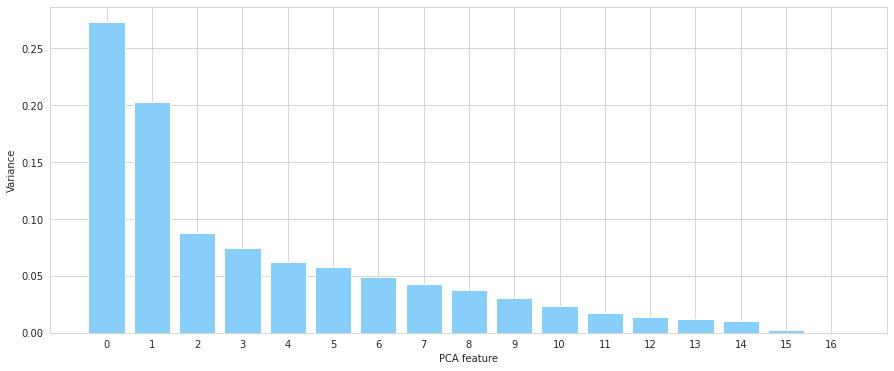

In [ ]:
# Variance yang dapat dijelaskan oleh tiap component (17 components)

pca = PCA(random_state=0)
pca.fit(df_scaled)

features = range(pca.n_components_)

plt.figure(figsize=(15,6))

plt.bar(features[:17], pca.explained_variance_ratio_[:17], color='lightskyblue')

plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:17]);

In [ ]:
# Variance pada PC-0
pca.explained_variance_ratio_[0]

0.2729513160753642

In [ ]:
# Variance pada PC-1
pca.explained_variance_ratio_[1]


0.203143914249239

In [ ]:
# Variance pada PC-0 dan PC-1
pca.explained_variance_ratio_[0:2].sum()

0.4760952303246032

### **Hanya menggunakan 2 Principal Component**

In [ ]:
# 2 principal components
pca = PCA(n_components=2, random_state=0)

# fit dan transform
X = pca.fit_transform(df_scaled)

In [ ]:
# Hanya 2 kolom yang akan kita gunakan untuk clustering nanti
X

array([[-1.68376791, -1.07256529],
       [-1.13484753,  2.50875148],
       [ 0.96905776, -0.38350456],
       ...,
       [-0.92848092, -1.80772345],
       [-2.33744046, -0.65344807],
       [-0.55757757, -0.40030011]])

### **Interpretasi**

- Dari proses PCA di atas, kita hanya akan menggunakan 2 Principal Components untuk nantinya digunakan pada Clustering.
- Variance yang dapat dijelaskan oleh 2 Principal Components ini sebesar 0.47

## **K-Means clustering**


### **Elbow method**

In [ ]:
# looping fitting Kmeans pada X dengan jumlah cluster 1-9
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range (2, 10)]
kmeans_models

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0)]

In [ ]:
kmeans_models[0].inertia_

49675.99799171917

In [ ]:
kmeans_models[1].inertia_


33025.62269224099

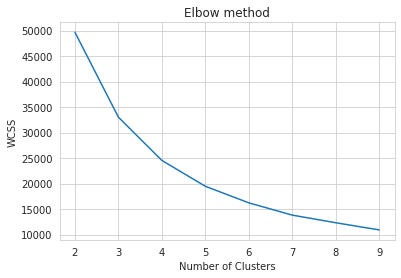

In [ ]:
# Within Cluster Sum of Square dari tiap model dengan jumlah cluster berbeda
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(2, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

**Interpretasi**

Dari Elbow Method, belum terlihat letak "elbow"nya untuk menentukan jumlah cluster terbaik

### **Silhouette method**

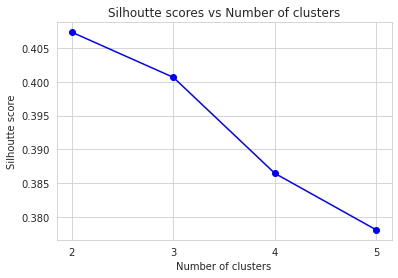

In [ ]:
# looping nilai silhotte score untuk tiap penggunaan jumlah cluster berbeda
silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[2:6]]

# line plot
plt.plot(range(2, 6), silhoutte_scores, 'bo-')

plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score');

In [ ]:
# looping nilai silhotte score untuk tiap penggunaan jumlah cluster berbeda (2-10 clusters)
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, random_state=0))

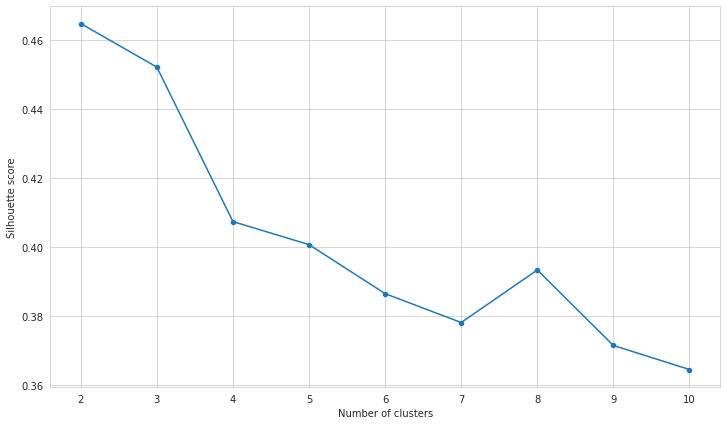

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

**Interpretasi**

Berdasarkan silhouette score-nya, jumlah cluster terbaik untuk dataset ini adalah 2 clusters.

### **Hasil Clustering dengan 2 cluster**

In [ ]:
# Kmean dengan jumlah cluster 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# label yang diberikan pada tiap data point dengan jumlah cluster 2 (0 dan 1)
labels = kmeans.labels_

# contoh
labels[0:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# hasil KMeans clustering dengan jumlah cluster 2

pca_df = pd.DataFrame(data=X, columns=['PC1', 'PC2'])

pca_df['labels'] = labels
pca_df.head()

,PC1,PC2,labels
0,-1.683768,-1.072565,0
1,-1.134848,2.508751,0
2,0.969058,-0.383505,0
3,-0.888423,0.004412,0
4,-1.600262,-0.684050,0


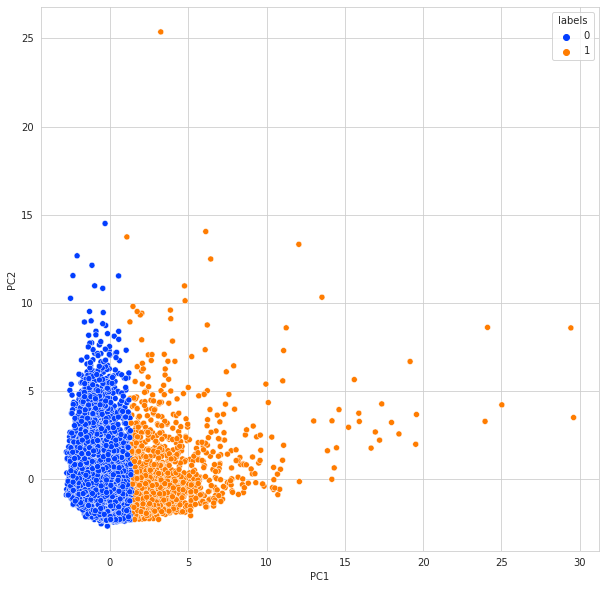

In [ ]:
# Visualisasi Cluster-0 (biru) dan Cluster-1 (orange)
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=pca_df, palette='bright');

### **Interpretasi**

- Jika kita menggunakan PCA pada clustering, tentu hasil model menjadi lebih sulit diinterpretasi karena principal component sederhananya adalah kombinasi dari berbagai fitur.
- Untuk dataset Creditcard dan hasil processing yang telah dilakukan, didapat bahwa jumlah cluster terbaik untuk PCA dengen 2 Components adalah 2 cluster.

Model Custering masih dapat diimprovisasi agar bisa mendapatkan nilai variance yang lebih besar untuk 2 principal component pertama, karena hasil yang didapat saat ini hanya sekitar 47% variance saja yang terwakili. Hal ini dapat dipengaruhi oleh karena adanya outliers pada data.

## **Experiment**

In [ ]:
# All data is transformed to the form of square root, then scaled using StandardScaler
df_sqrt = np.sqrt(df)

scaling = StandardScaler()
df_scaling = scaling.fit_transform(df_sqrt)

df_scaling = pd.DataFrame(df_scaling)
df_scaling.columns = df.columns

In [ ]:
df_scaled['BALANCE'].skew()

2.393270481328753

In [ ]:
df_scaling['BALANCE'].skew()

0.8294274734650835

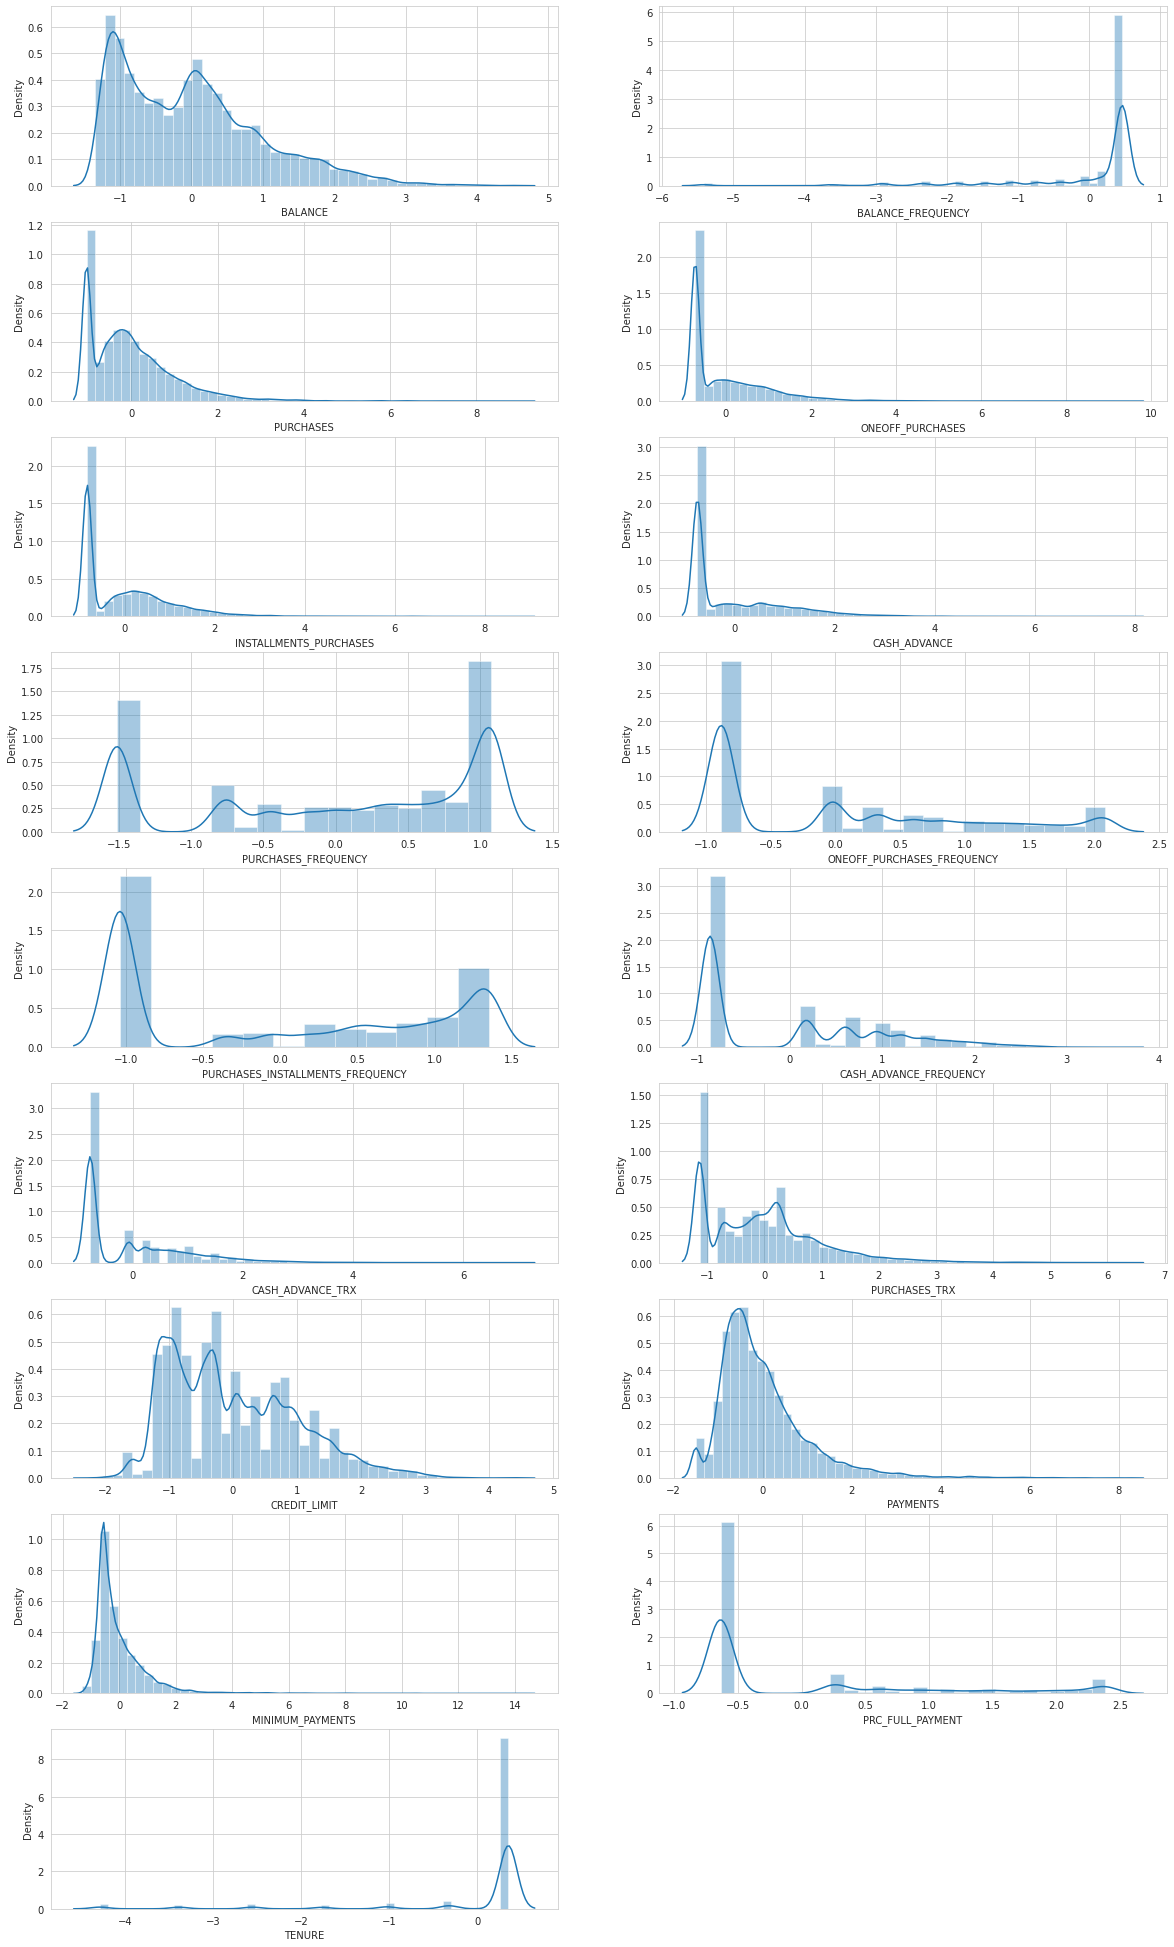

In [ ]:
# distribusi data setelah ditransformasi dengan diakarkan (square root) kemudian discaling dengan StandardScaler

plt.figure(figsize=(20,35))
for i, col in enumerate(df_scaling.columns):
    if df_scaling[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df_scaling[col], kde_kws = {'bw' : 0.1}, ax=ax)

        plt.xlabel(col)

plt.show()

In [ ]:
pca = PCA(random_state=0)
pca.fit(df_scaling)

PCA(random_state=0)

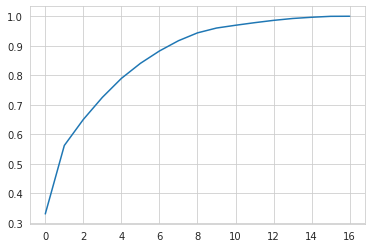

In [ ]:
sns.set_style('whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum());

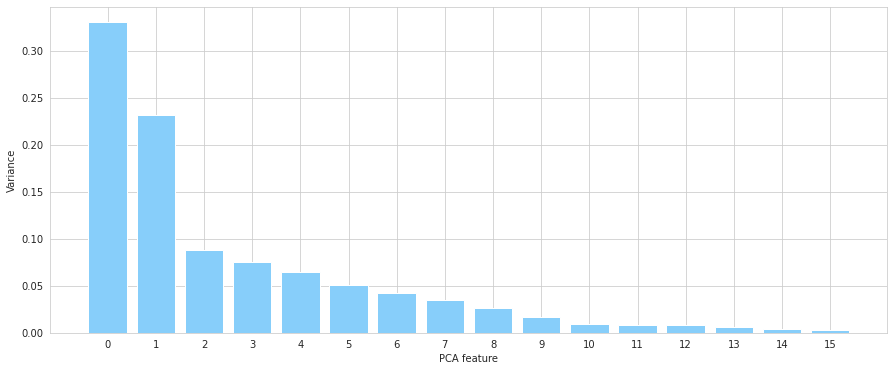

In [ ]:
# Variance explained with the number of features
pca = PCA(random_state=0)
pca.fit(df_scaling)
features = range(pca.n_components_)

plt.figure(figsize=(15,6))

plt.bar(features[:16], pca.explained_variance_ratio_[:16], color='lightskyblue')

plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:16]);

In [ ]:
pca.explained_variance_ratio_[0:2].sum()

0.5622556831752389

Dengan melakukan transformasi pada data set dengan diakarkan, kita dapat menaikkan variancenya
- tanpa transformasi: 0.47
- dengan transformasi: 0.56

In [ ]:
pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(df_scaling)

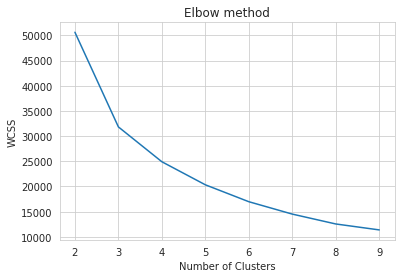

In [ ]:
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X2) for k in range (2, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(2, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

Berdasarkan Elbow Method, terlihat elbow-nya terletak pada jumlah cluster 3

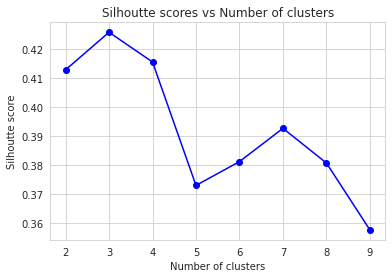

In [ ]:
silhoutte_scores = [silhouette_score(X2, model.labels_) for model in kmeans_models]
plt.plot(range(2, 10), silhoutte_scores, 'bo-')
plt.xticks(list(np.arange(2,10)))
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score');

Berdasarkan Silhouette score, score tertinggi pada jumlah cluster 3

In [ ]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X2)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X2, labels, metric = 'euclidean', random_state=0))

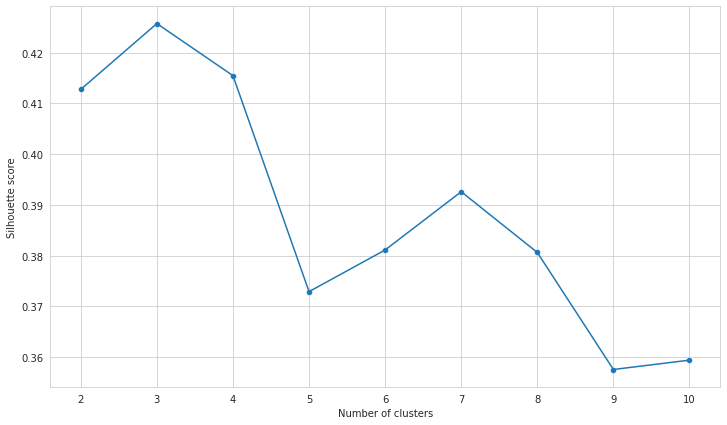

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

### **Clustering dengan 3 clusters**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X2)

labels = kmeans.labels_
labels[:100]

array([0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1,
       0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0], dtype=int32)

In [ ]:
pca_df = pd.DataFrame(data=X2, columns=['PC1', 'PC2'])
pca_df['labels'] = labels
pca_df.head()

,PC1,PC2,labels
0,-0.893102,-2.470296,0
1,-2.997217,2.030083,2
2,1.191889,0.386961,0
3,-0.771674,0.015639,2
4,-1.271139,-1.578252,0


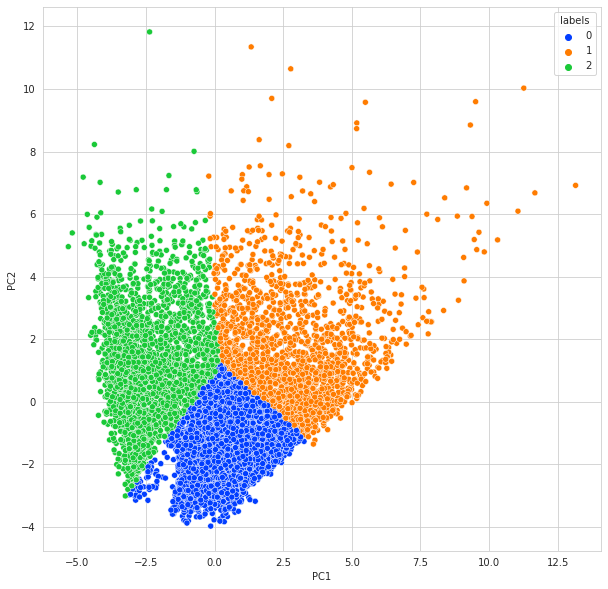

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=pca_df, palette='bright');

## **Latihan Agglomerative Clustering  & DBScan**

- Lakukan EDA untuk memahami dataset.
- Jelaskan mengenai insight yang didapat dari EDA!
<br><br>
- Untuk clustering, drop saja feature 'CustomerID' dan 'Gender'. Dari 3 feature tersisa, pilih kombinasi 2 feature terbaik yang selanjutnya akan digunakan untuk clustering.
- Lakukan scaling menggunakan StandardScaler, lalu gunakan metode K-Means, Agglomerative clustering, dan DBScan. Cari jumlah cluster paling optimal untuk tiap metode.
<br><br>
- Bandingkan hasil dari ketiga metode yang sudah dicoba, manakah metode yang terbaik?
- Interpretasikan hasil clustering-nya!<br>
